In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np
import pandas as pd
#Take price in Crore and area in marla
df = pd.read_csv('final data mid (1) (3).csv')
df.head() 

,price in crore,type,location,District,bathroom,bedroom,area,latitude,longitude
0,0.2500,Flat,Bahria Town Karachi,Malir,2,2,4.9,25.021452,67.303431
1,0.9720,Flat,Bahria Town Karachi,Malir,4,4,5.4,25.021452,67.303431
2,0.7420,Flat,Bahria Town Karachi,Malir,3,3,4.2,25.021452,67.303431
3,0.4464,Flat,Bahria Town Karachi,Malir,2,2,2.5,25.021452,67.303431
4,4.1000,House,DHA Defence,South,4,3,4.0,24.798393,67.032767


In [3]:
dummy_1 =pd.get_dummies(df.type)
dummy_2 =pd.get_dummies(df.District)
merge = pd.concat([df,dummy_1,dummy_2],axis='columns')
final = merge.drop(['location','type','District'],axis='columns')
final

,price in crore,bathroom,bedroom,area,latitude,longitude,Farm House,Flat,House,Lower Portion,...,Malir,SOUTH,South,WEST,West,central,east,malir,south,west
0,0.2500,2,2,4.900000,25.021452,67.303431,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.9720,4,4,5.400000,25.021452,67.303431,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.7420,3,3,4.200000,25.021452,67.303431,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.4464,2,2,2.500000,25.021452,67.303431,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4.1000,4,3,4.000000,24.798393,67.032767,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23411,1.9900,3,3,7.933872,25.092281,66.961481,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
23412,70.0000,3,3,4.958670,24.927473,67.064127,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23413,3.8000,4,4,10.942132,24.855068,67.049931,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
23414,3.0600,3,3,9.454531,24.855068,67.049931,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


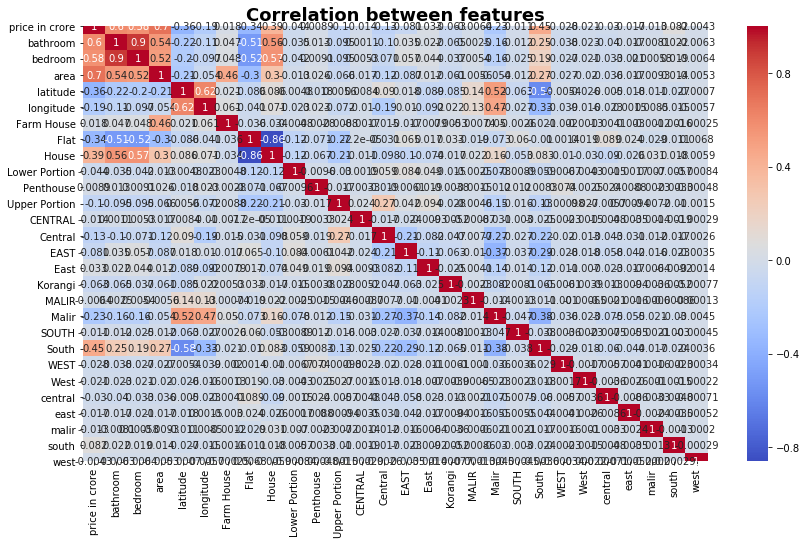

In [4]:
import seaborn as sns
#correlatin
train_corr=final.corr()
f,ax=plt.subplots(figsize=(14,8))
sns.heatmap(train_corr,cmap='coolwarm',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

In [5]:
X = final.iloc[:, 1:].values 
 
Y = final.iloc[:, 0].values 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
reg = ensemble.GradientBoostingRegressor(**params)
reg = reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
Y_pred

array([ 1.66769881, 10.12547942,  1.56292351, ...,  1.04606697,
        0.683092  ,  5.27572058])

In [8]:
from sklearn import metrics

print('Mean Squared Error:', metrics.mean_squared_error(Y_test,reg.predict(X_test)  ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,reg.predict(X_test) )))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, reg.predict(X_test)))

Mean Squared Error: 2.436124609288675
Root Mean Squared Error: 1.5608089598950523
Mean Absolute Error: 0.6448436616899064


In [9]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.869157422877545

In [10]:
print(reg.score(X_train, Y_train))

0.8614236150993474


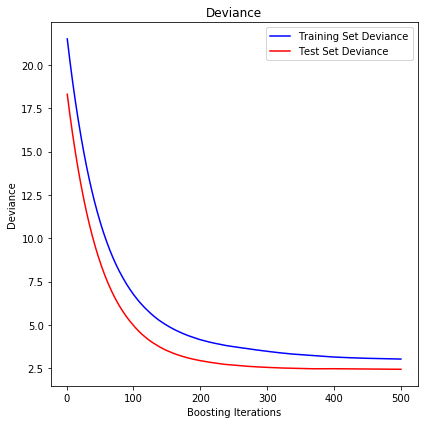

In [11]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, Y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(Y_test, Y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()